# Formación NTT Data University: Orientación de ML Engineering

In [1]:
!pip install pyspark

     |████████████████████████████████| 212.4MB 79kB/s 
     |████████████████████████████████| 204kB 21.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=ec344bb6990467d0a029796bcccfe25dd004c0c5651175155c15a2fba1216b7b
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark import SparkConf

In [3]:
spark = SparkSession.builder.appName("Test_spark").master("local[*]").getOrCreate()
sqlCtx = SQLContext(sparkContext=spark.sparkContext, sparkSession=spark)
spark

In [4]:
df = spark.createDataFrame([{"hello": "word"} for x in range(1000)])
df.show(3, False)

+-----+
|hello|
+-----+
|word |
|word |
|word |
+-----+
only showing top 3 rows



* FTHG and HG = Full Time Home Team Goals
* FTAG and AG = Full Time Away Team Goals
* FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
* HTHG = Half Time Home Team Goals
* HTAG = Half Time Away Team Goals
* HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
* HS = Home Team Shots
* AS = Away Team Shots
* HST = Home Team Shots on Target
* AST = Away Team Shots on Target
* HC = Home Team Corners
* AC = Away Team Corners
* HF = Home Team Fouls Committed
* AF = Away Team Fouls Committed
* HY = Home Team Yellow Cards
* AY = Away Team Yellow Cards
* HR = Home Team Red Cards
* AR = Away Team Red Cards

In [5]:
from google.colab import files
uploaded = files.upload()

Saving LaLigaTemporada1718.csv to LaLigaTemporada1718.csv


In [8]:
df = sqlCtx.read.load('LaLigaTemporada1718.csv', format='com.databricks.spark.csv', header='true', inferSchema='true', sep=",")
df.printSchema()

root
 |-- Div: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- HomeTeam: string (nullable = true)
 |-- AwayTeam: string (nullable = true)
 |-- FTHG: integer (nullable = true)
 |-- FTAG: integer (nullable = true)
 |-- FTR: string (nullable = true)
 |-- HTHG: integer (nullable = true)
 |-- HTAG: integer (nullable = true)
 |-- HTR: string (nullable = true)
 |-- HS: integer (nullable = true)
 |-- AS: integer (nullable = true)
 |-- HST: integer (nullable = true)
 |-- AST: integer (nullable = true)
 |-- HF: integer (nullable = true)
 |-- AF: integer (nullable = true)
 |-- HC: integer (nullable = true)
 |-- AC: integer (nullable = true)
 |-- HY: integer (nullable = true)
 |-- AY: integer (nullable = true)
 |-- HR: integer (nullable = true)
 |-- AR: integer (nullable = true)
 |-- B365H: double (nullable = true)
 |-- B365D: double (nullable = true)
 |-- B365A: double (nullable = true)
 |-- BWH: double (nullable = true)
 |-- BWD: double (nullable = true)
 |-- BWA: double (nulla

In [9]:
df.describe().toPandas()

,summary,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,count,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,381,381,381,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,381,381,381
1,mean,None,None,None,None,2.007853403141361,1.3664921465968587,None,0.9057591623036649,0.599476439790576,None,13.570680628272251,10.479057591623036,4.769633507853404,3.8219895287958114,13.69109947643979,13.947643979057592,5.646596858638744,4.19109947643979,2.3272251308900525,2.662303664921466,0.1099476439790576,0.07853403141361257,2.7699476439790605,4.261256544502617,5.206832460732981,2.7370942408376964,4.281439790575915,5.22096858638743,2.7146596858638765,4.162434554973819,5.051230366492142,2.7345669291338597,4.157742782152228,5.386535433070864,2.849031413612564,4.544397905759167,5.539764397905757,2.7303141361256547,4.094476439790573,5.0643717277486875,2.7550000000000012,4.420732984293191,5.485628272251311,37.725130890052355,2.9584554973822006,2.735785340314136,4.641335078534032,4.26544502617801,6.124764397905759,5.204005235602092,34.05759162303665,1.947513089005237,1.8691884816753916,2.287827225130891,2.1662041884816756,18.164921465968586,-0.41164921465968585,1.988193717277489,1.9378272251308892,1.9875130890052342,1.9369895287958123,2.8309186351706033,4.517664041994751,5.721653543307091
2,stddev,None,None,None,None,6.5470188041999275,4.500420248523907,None,3.4990089822484687,2.3239706582008233,None,4.567255251560239,4.205774202491592,2.449343877375211,2.321809914857364,4.335518247339998,4.332915247219021,2.7240980476129124,2.458607323075625,1.5841213886110406,1.606611318441073,0.3215048235755743,0.2789367657933677,2.2851525784863767,1.8702462375661357,4.84865927494476,2.181607605500172,1.8618385546152827,4.963795522431591,2.122842091465975,1.5204195752101073,4.949401173176277,2.268436659407872,1.8455006871568622,5.962877313841481,2.4319801409211257,2.3478070471174366,5.410036138554108,2.186724538098347,1.632594544968945,4.632369562866031,2.1962267511022664,2.0433699166278045,5.77004391855779,3.34700820040584,2.608804690411392,2.1725208904443423,2.4212502026010583,1.8282189275634313,7.300041586333172,5.004636268346604,3.9260663945102694,0.3984515219117535,0.3676835639875137,0.8561754925291326,0.7404779545957146,2.0788965549552176,0.950660305121808,0.13878034216882906,0.13122176333542132,0.1417748153002681,0.13360180934261287,2.397625458260565,2.169238297674638,5.812995798496339
3,min,SP1,01/03/18,Alaves,Alaves,0,0,A,0,0,A,2,1,0,0,3,0,0,0,0,0,0,0,1.05,2.79,1.17,1.05,2.95,1.18,1.07,3.05,1.2,1.05,2.9,1.17,1.05,3.02,1.18,1.06,2.9,1.17,1.04,3.0,1.18,3,1.08,1.05,3.11,2.94,1.21,1.17,3,1.13,1.12,1.47,1.41,1,-3.25,1.61,1.58,1.68,1.63,1.06,2.93,1.16
4,max,SP1,31/03/18,Villarreal,Villarreal,100,86,H,51,44,H,30,24,14,13,29,29,16,14,8,9,2,2,17.0,15.0,34.0,14.5,15.5,34.0,15.0,12.0,27.0,19.0,17.0,41.0,19.65,20.38,36.5,17.0,15.0,26.0,15.0,17.0,36.0,43,19.65,16.3,20.38,15.32,67.0,33.42,42,3.08,2.85,7.0,5.97,24,2.0,2.42,2.34,2.52,2.44,18.7,18.5,46.0


In [10]:
import pyspark.sql.functions as func
df.select('HomeTeam', 'AwayTeam', 'FTHG', 'FTAG').show(4)

+--------+----------+----+----+
|HomeTeam|  AwayTeam|FTHG|FTAG|
+--------+----------+----+----+
| Leganes|    Alaves|   1|   0|
|Valencia|Las Palmas|   1|   0|
|   Celta|  Sociedad|   2|   3|
|  Girona|Ath Madrid|   2|   2|
+--------+----------+----+----+
only showing top 4 rows



In [11]:
df2 = df.withColumn('Goals', func.col('FTHG') + func.col('FTAG'))
df2.select('HomeTeam', 'AwayTeam', 'FTHG', 'FTAG').orderBy(func.desc('Goals')).show(10)

+-----------+-----------+----+----+
|   HomeTeam|   AwayTeam|FTHG|FTAG|
+-----------+-----------+----+----+
| Las Palmas| Villarreal|  79|  86|
|Real Madrid|  Barcelona| 100|   0|
|      Betis|   Valencia|   3|   6|
|Real Madrid|     Girona|   6|   3|
|    Levante|  Barcelona|   5|   4|
|   Sociedad|      Betis|   4|   4|
|      Betis|Real Madrid|   3|   5|
|    Sevilla|      Betis|   3|   5|
|Real Madrid|  La Coruna|   7|   1|
| Las Palmas|      Celta|   2|   5|
+-----------+-----------+----+----+
only showing top 10 rows



In [14]:
print(df.count())
print(len(df.columns))

382
64


In [15]:
df2 = df.drop('BbMx>2.5')
df3 = df2.drop('BbAv>2.5')
df4 = df3.drop('BbMx<2.5')
df5 = df4.drop('BbAv<2.5')

In [17]:
removeAllMV = df5.na.drop()
removeAllMV.count()

380

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

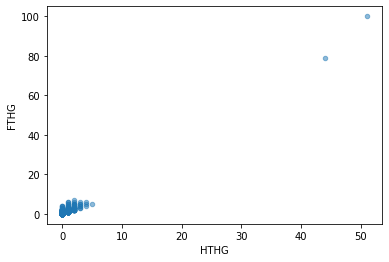

In [21]:
df_diagram = removeAllMV.toPandas()
data = pd.concat([df_diagram['FTHG'], df_diagram['HTHG']], axis=1)
data.plot.scatter(x='HTHG', y='FTHG', alpha=0.5);

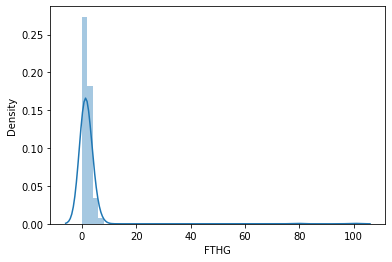

In [22]:
sns.distplot(df_diagram['FTHG'])

In [23]:
bounds = {
    c: dict(
        zip(["d1","d9"], removeAllMV.approxQuantile(c, [0.1, 0.9], 0))
    )
    for c,d in zip (df.columns, df.dtypes) if d[1] == "int"
}
 
for c in bounds:
    iqr = bounds [c]['d9'] - bounds[c]['d1']
    bounds[c]['min'] = bounds[c]['d1'] - (iqr * 1.5)
    bounds[c]['max'] = bounds[c]['d9'] + (iqr * 1.5)
 
bounds

{'AC': {'d1': 1.0, 'd9': 7.0, 'max': 16.0, 'min': -8.0},
 'AF': {'d1': 9.0, 'd9': 19.0, 'max': 34.0, 'min': -6.0},
 'AR': {'d1': 0.0, 'd9': 0.0, 'max': 0.0, 'min': 0.0},
 'AS': {'d1': 5.0, 'd9': 16.0, 'max': 32.5, 'min': -11.5},
 'AST': {'d1': 1.0, 'd9': 7.0, 'max': 16.0, 'min': -8.0},
 'AY': {'d1': 1.0, 'd9': 5.0, 'max': 11.0, 'min': -5.0},
 'Bb1X2': {'d1': 34.0, 'd9': 42.0, 'max': 54.0, 'min': 22.0},
 'BbAH': {'d1': 15.0, 'd9': 20.0, 'max': 27.5, 'min': 7.5},
 'BbOU': {'d1': 30.0, 'd9': 39.0, 'max': 52.5, 'min': 16.5},
 'FTAG': {'d1': 0.0, 'd9': 3.0, 'max': 7.5, 'min': -4.5},
 'FTHG': {'d1': 0.0, 'd9': 3.0, 'max': 7.5, 'min': -4.5},
 'HC': {'d1': 2.0, 'd9': 9.0, 'max': 19.5, 'min': -8.5},
 'HF': {'d1': 9.0, 'd9': 19.0, 'max': 34.0, 'min': -6.0},
 'HR': {'d1': 0.0, 'd9': 1.0, 'max': 2.5, 'min': -1.5},
 'HS': {'d1': 8.0, 'd9': 20.0, 'max': 38.0, 'min': -10.0},
 'HST': {'d1': 2.0, 'd9': 8.0, 'max': 17.0, 'min': -7.0},
 'HTAG': {'d1': 0.0, 'd9': 1.0, 'max': 2.5, 'min': -1.5},
 'HTHG': {'

In [24]:
import pyspark.sql.functions as f
 
removeOutliers = removeAllMV.select (
'Div','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS',
'HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','B365H','B365D','B365A','BWH','BWD',
'BWA','IWH','IWD','IWA','LBH','LBD','LBA','PSH','PSD','PSA','WHH','WHD','WHA','VCH',
'VCD','VCA','Bb1X2','BbMxH','BbAvH','BbMxD','BbAvD','BbMxA','BbAvA','BbOU','BbAH',
'BbAHh','BbMxAHH','BbAvAHH','BbMxAHA','BbAvAHA','PSCH','PSCD','PSCA',
    *[
        f.when(
            ~f.col('FTHG').between(bounds['FTHG']['min'], bounds['FTHG']['max']),
"yes"
        ).otherwise("no").alias('FTHG_outlier')
    ]
)
 
removeOutliers.filter("FTHG_outlier = 'yes'").collect()

[Row(Div='SP1', Date='20/05/18', HomeTeam='Real Madrid', AwayTeam='Barcelona', FTHG=100, FTAG=0, FTR='H', HTHG=51, HTAG=0, HTR='H', HS=22, AS=12, HST=5, AST=7, HF=8, AF=11, HC=8, AC=4, HY=0, AY=0, HR=0, AR=0, B365H=1.4, B365D=4.75, B365A=8.0, BWH=1.36, BWD=5.0, BWA=8.5, IWH=1.45, IWD=4.5, IWA=7.0, LBH=1.36, LBD=5.2, LBA=7.5, PSH=1.36, PSD=5.56, PSA=8.97, WHH=1.36, WHD=4.5, WHA=9.5, VCH=1.4, VCD=5.4, VCA=8.0, Bb1X2=41, BbMxH=1.45, BbAvH=1.37, BbMxD=5.66, BbAvD=5.15, BbMxA=9.5, BbAvA=7.94, BbOU=34, BbAH=19, BbAHh=-1.5, BbMxAHH=2.01, BbAvAHH=1.97, BbMxAHA=1.94, BbAvAHA=1.89, PSCH=1.27, PSCD=6.44, PSCA=10.71, FTHG_outlier='yes'),
 Row(Div='SP1', Date='20/05/18', HomeTeam='Las Palmas', AwayTeam='Villarreal', FTHG=79, FTAG=86, FTR='A', HTHG=44, HTAG=44, HTR='D', HS=22, AS=12, HST=9, AST=7, HF=3, AF=15, HC=16, AC=4, HY=0, AY=0, HR=0, AR=0, B365H=1.4, B365D=4.75, B365A=8.0, BWH=1.36, BWD=5.0, BWA=8.5, IWH=1.45, IWD=4.5, IWA=7.0, LBH=1.36, LBD=5.2, LBA=7.5, PSH=1.36, PSD=5.56, PSA=8.97, WHH=1.3

In [25]:
cleanDataset = removeOutliers.filter("FTHG_outlier = 'no'")
cleanDataset.drop("FTHG_outlier")
cleanDataset.count()

378

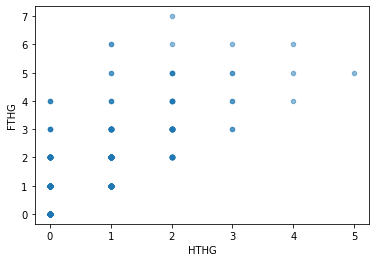

In [27]:
df_diagram = cleanDataset.toPandas()
data = pd.concat([df_diagram['FTHG'], df_diagram['HTHG']], axis=1)
data.plot.scatter(x='HTHG', y='FTHG', alpha=0.5);

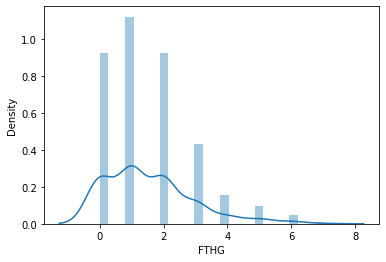

In [28]:
sns.distplot(df_diagram['FTHG'])

In [29]:
dfGanar = cleanDataset.withColumn('ganaLocal', func.col('FTHG') - func.col('FTAG'))
dfGanar.select("HomeTeam","AwayTeam","FTHG","FTAG","ganaLocal").show(20)

+-----------+-----------+----+----+---------+
|   HomeTeam|   AwayTeam|FTHG|FTAG|ganaLocal|
+-----------+-----------+----+----+---------+
|    Leganes|     Alaves|   1|   0|        1|
|   Valencia| Las Palmas|   1|   0|        1|
|      Celta|   Sociedad|   2|   3|       -1|
|     Girona| Ath Madrid|   2|   2|        0|
|    Sevilla|    Espanol|   1|   1|        0|
| Ath Bilbao|     Getafe|   0|   0|        0|
|  Barcelona|      Betis|   2|   0|        2|
|  La Coruna|Real Madrid|   0|   3|       -3|
|    Levante| Villarreal|   1|   0|        1|
|     Malaga|      Eibar|   0|   1|       -1|
|      Betis|      Celta|   2|   1|        1|
|   Sociedad| Villarreal|   3|   0|        3|
|     Alaves|  Barcelona|   0|   2|       -2|
|     Girona|     Malaga|   1|   0|        1|
| Las Palmas| Ath Madrid|   1|   5|       -4|
|    Levante|  La Coruna|   2|   2|        0|
|      Eibar| Ath Bilbao|   0|   1|       -1|
|    Espanol|    Leganes|   0|   1|       -1|
|     Getafe|    Sevilla|   0|   1

In [30]:
from pyspark.ml.feature import Binarizer
 
binarizer = Binarizer(threshold=0.1, inputCol = 'ganaLocal', outputCol = 'label')
dfGanar2 = dfGanar.withColumn("ganaLocal", func.round(dfGanar["ganaLocal"]).cast('double'))
 
binarizerDF = binarizer.transform(dfGanar2)
 
binarizerDF.select("HomeTeam","AwayTeam","FTHG","FTAG","label").show(20)

+-----------+-----------+----+----+-----+
|   HomeTeam|   AwayTeam|FTHG|FTAG|label|
+-----------+-----------+----+----+-----+
|    Leganes|     Alaves|   1|   0|  1.0|
|   Valencia| Las Palmas|   1|   0|  1.0|
|      Celta|   Sociedad|   2|   3|  0.0|
|     Girona| Ath Madrid|   2|   2|  0.0|
|    Sevilla|    Espanol|   1|   1|  0.0|
| Ath Bilbao|     Getafe|   0|   0|  0.0|
|  Barcelona|      Betis|   2|   0|  1.0|
|  La Coruna|Real Madrid|   0|   3|  0.0|
|    Levante| Villarreal|   1|   0|  1.0|
|     Malaga|      Eibar|   0|   1|  0.0|
|      Betis|      Celta|   2|   1|  1.0|
|   Sociedad| Villarreal|   3|   0|  1.0|
|     Alaves|  Barcelona|   0|   2|  0.0|
|     Girona|     Malaga|   1|   0|  1.0|
| Las Palmas| Ath Madrid|   1|   5|  0.0|
|    Levante|  La Coruna|   2|   2|  0.0|
|      Eibar| Ath Bilbao|   0|   1|  0.0|
|    Espanol|    Leganes|   0|   1|  0.0|
|     Getafe|    Sevilla|   0|   1|  0.0|
|Real Madrid|   Valencia|   2|   2|  0.0|
+-----------+-----------+----+----

In [31]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
 
featureColumns = ['HS', 'AS', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']
 
assembler= VectorAssembler(inputCols=featureColumns, outputCol="features")
assembled=assembler.transform(binarizerDF)
 
(trainingData, testData) = assembled.randomSplit([0.8,0.2], seed=13234)
trainingData.count(), testData.count()

(297, 81)

In [32]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=5, minInstancesPerNode=20, impurity="gini")

from pyspark.ml import Pipeline
 
pipeline = Pipeline(stages=[dt])
model = pipeline.fit (trainingData)
predictions = model.transform(testData)
predictions.select("prediction", "label").show()

+----------+-----+
|prediction|label|
+----------+-----+
|       1.0|  1.0|
|       1.0|  1.0|
|       0.0|  1.0|
|       0.0|  1.0|
|       0.0|  0.0|
|       0.0|  1.0|
|       0.0|  1.0|
|       0.0|  1.0|
|       0.0|  1.0|
|       1.0|  0.0|
|       0.0|  1.0|
|       0.0|  1.0|
|       1.0|  1.0|
|       0.0|  1.0|
|       1.0|  0.0|
|       1.0|  0.0|
|       0.0|  1.0|
|       1.0|  1.0|
|       0.0|  0.0|
|       0.0|  1.0|
+----------+-----+
only showing top 20 rows



In [33]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator (labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy=evaluator.evaluate(predictions)
print("Accuracy = %g" %(accuracy*100))

Accuracy = 43.2099


In [40]:
featureColumns = ['HST', 'AST']
 
assembler= VectorAssembler(inputCols=featureColumns, outputCol="features")
assembled=assembler.transform(binarizerDF)
 
(trainingData, testData) = assembled.randomSplit([0.8,0.2], seed=13234)
trainingData.count(), testData.count()

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=5, minInstancesPerNode=20, impurity="gini")

pipeline = Pipeline(stages=[dt])
model = pipeline.fit (trainingData)
predictions = model.transform(testData)
predictions2= predictions.select("prediction", "label")
predictions2.show()

+----------+-----+
|prediction|label|
+----------+-----+
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       0.0|  1.0|
|       0.0|  0.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       0.0|  0.0|
|       0.0|  1.0|
|       1.0|  1.0|
|       1.0|  1.0|
|       0.0|  1.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  1.0|
|       1.0|  1.0|
|       1.0|  0.0|
|       1.0|  1.0|
+----------+-----+
only showing top 20 rows



In [41]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator (labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy=evaluator.evaluate(predictions)
print("Accuracy = %g" %(accuracy*100))

Accuracy = 67.9012


In [42]:
from pyspark.mllib.evaluation import MulticlassMetrics
 
predictions2.rdd.take(2)
predictions2.rdd.map(tuple).take(2)
metrics = MulticlassMetrics(predictions2.rdd.map(tuple))
metrics.confusionMatrix().toArray().transpose()

array([[28., 17.],
       [ 9., 27.]])